In [1]:
import os 
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from utils import SpatialDataset
from torchvision import transforms, utils
import warnings

### Create dataset

In [2]:
counts_path = 'data/merfish/hypo_ani1_counts.csv'
centroids_path = 'data/merfish/hypo_ani1_cellcentroids.csv'
metadata_path = 'data/merfish/hypo_ani1_metadata.csv'

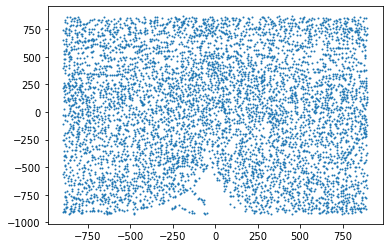

In [3]:
dset = SpatialDataset(counts_path = counts_path, 
                      centroids_path = centroids_path,
                      metadata_path = metadata_path, 
                      label = 'Cell_class')
dset.plot()

### Train-test split and dataloader

In [4]:
## Config
batch_size = 16
validation_split = 0.2
shuffle_dataset = True
random_seed = 42

## Create data indices for training and validation
dataset_size = len(dset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

## Create data samplers and loaders
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
train_loader = DataLoader(dset, batch_size = batch_size, sampler = train_sampler)
val_loader = DataLoader(dset, batch_size = batch_size, sampler = val_sampler)

### Training

In [15]:
num_epochs = 1
for epoch in range(num_epochs):
    for batch_index, out in enumerate(train_loader):
        if batch_index == 1:
            break
        print(out['neighbor_labels'].shape)

torch.Size([16, 20, 16])
